In [ ]:
#Problem 1
import pandas as pd

file_path = "/content/drive/MyDrive/Concepts of AI /Datasets/diabetes.csv"
df = pd.read_csv(file_path)

#1
#display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

#check data types and missing values
print("\nDataset Info:")
print(df.info())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())

#summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

In [ ]:
#2 Handle Missing Data:
columns_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_missing:
    df[column].fillna(df[column].mean(), inplace=True)
    print(f"Missing values in {column}: {df[column].isnull().sum()}")

Missing values in Glucose: 0
Missing values in BloodPressure: 0
Missing values in SkinThickness: 0
Missing values in Insulin: 0
Missing values in BMI: 0


<ipython-input-7-0c0ee3e8d24b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
#3 Feature Engineering:
import numpy as np

X = df.drop(columns=['Outcome'])
y = df['Outcome']

np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

#define the split point
split_idx = int(X.shape[0] * 0.7)

#split the indices
train_idx = indices[:split_idx]
test_idx = indices[split_idx:]

#split X and y into train and test sets using .iloc for pandas
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print("Shapes of Train and Test Data:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Shapes of Train and Test Data:
X_train: (537, 8) y_train: (537,)
X_test: (231, 8) y_test: (231,)


In [7]:
#4 Implement KNN:
import numpy as np
import time

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def predict(self, X_test):
        return np.array([self.predict_single(x) for x in X_test])

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

def experiment_with_k(X_train, X_test, y_train, y_test):
    results = []

    for k in range(1, 16):
        knn_original = KNN(k)
        knn_original.fit(X_train, y_train)

        start_time = time.time()
        predictions_original = knn_original.predict(X_test)
        end_time = time.time()
        accuracy_original = np.mean(predictions_original == y_test)
        time_original = end_time - start_time

        X_train_scaled = standardize(X_train)
        X_test_scaled = standardize(X_test)

        knn_scaled = KNN(k)
        knn_scaled.fit(X_train_scaled, y_train)

        start_time = time.time()
        predictions_scaled = knn_scaled.predict(X_test_scaled)
        end_time = time.time()
        accuracy_scaled = np.mean(predictions_scaled == y_test)
        time_scaled = end_time - start_time
        results.append({
            'k': k,
            'accuracy_original': accuracy_original,
            'accuracy_scaled': accuracy_scaled,
            'time_original': time_original,
            'time_scaled': time_scaled,
        })
    return results
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = experiment_with_k(X_train, X_test, y_train, y_test)
for result in results:
    print(f"k = {result['k']}")
    print(f"Accuracy (Original): {result['accuracy_original']:.2f}, Time (Original): {result['time_original']:.4f} sec")
    print(f"Accuracy (Scaled): {result['accuracy_scaled']:.2f}, Time (Scaled): {result['time_scaled']:.4f} sec")
    print()

k = 1
Accuracy (Original): 1.00, Time (Original): 0.0416 sec
Accuracy (Scaled): 0.97, Time (Scaled): 0.0458 sec

k = 2
Accuracy (Original): 1.00, Time (Original): 0.0412 sec
Accuracy (Scaled): 0.93, Time (Scaled): 0.0417 sec

k = 3
Accuracy (Original): 1.00, Time (Original): 0.0413 sec
Accuracy (Scaled): 0.97, Time (Scaled): 0.0414 sec

k = 4
Accuracy (Original): 1.00, Time (Original): 0.0401 sec
Accuracy (Scaled): 0.93, Time (Scaled): 0.0413 sec

k = 5
Accuracy (Original): 1.00, Time (Original): 0.0412 sec
Accuracy (Scaled): 0.97, Time (Scaled): 0.0419 sec

k = 6
Accuracy (Original): 1.00, Time (Original): 0.0414 sec
Accuracy (Scaled): 0.93, Time (Scaled): 0.0416 sec

k = 7
Accuracy (Original): 0.97, Time (Original): 0.0414 sec
Accuracy (Scaled): 0.97, Time (Scaled): 0.0419 sec

k = 8
Accuracy (Original): 1.00, Time (Original): 0.0418 sec
Accuracy (Scaled): 0.97, Time (Scaled): 0.0414 sec

k = 9
Accuracy (Original): 1.00, Time (Original): 0.0416 sec
Accuracy (Scaled): 0.97, Time (Scal

In [ ]:
#Problem 2
#1
import numpy as np
import pandas as pd
from collections import Counter

#euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#KNN Class
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        #ensure to iterate over the rows properly with .iloc for DataFrame row access
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train.values] # .values to access array of values

        #find the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices] # .iloc to properly reference the row index
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test.values]  # Use .values to access array of values
        return np.array(predictions)

#function to standardize (scale) the data
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

#convert all columns to numeric, forcing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

#handle any remaining NaN values (if any after conversion)
X_train = X_train.fillna(X_train.mean())  # Fill NaN with the mean value
X_test = X_test.fillna(X_test.mean())    # Fill NaN with the mean value

#1
X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)

#initialize and train the KNN model on scaled data
k = 3
knn = KNN(k=k)
knn.fit(X_train_scaled, y_train)
predictions_scaled = knn.predict(X_test_scaled)

#calculate Accuracy on Scaled Dataset
accuracy_scaled = np.mean(predictions_scaled == y_test)
print(f"Accuracy on Scaled Dataset: {accuracy_scaled:.2f}")

#2
knn_original = KNN(k=3)
knn_original.fit(X_train, y_train)
predictions_original = knn_original.predict(X_test)

#calculate Accuracy on Original Dataset
accuracy_original = np.mean(predictions_original == y_test)

#3
print(f"Accuracy on Original (Unscaled) Dataset: {accuracy_original:.2f}")
print(f"Accuracy on Scaled Dataset: {accuracy_scaled:.2f}")

Accuracy on Scaled Dataset: 0.73
Accuracy on Original (Unscaled) Dataset: 0.70
Accuracy on Scaled Dataset: 0.73


Scaling improves KNN performance by ensuring all features contribute equally to the distance calculation, preventing features with larger values from dominating and leading to inaccurate predictions. Without scaling, the model may be biased, while scaling helps KNN make better comparisons between data points, resulting in improved accuracy. The choice of k also benefits from scaling, as it clarifies the relationship between neighbors. Overall, scaling ensures fair treatment of features, boosting the accuracy and efficiency of the KNN algorithm.

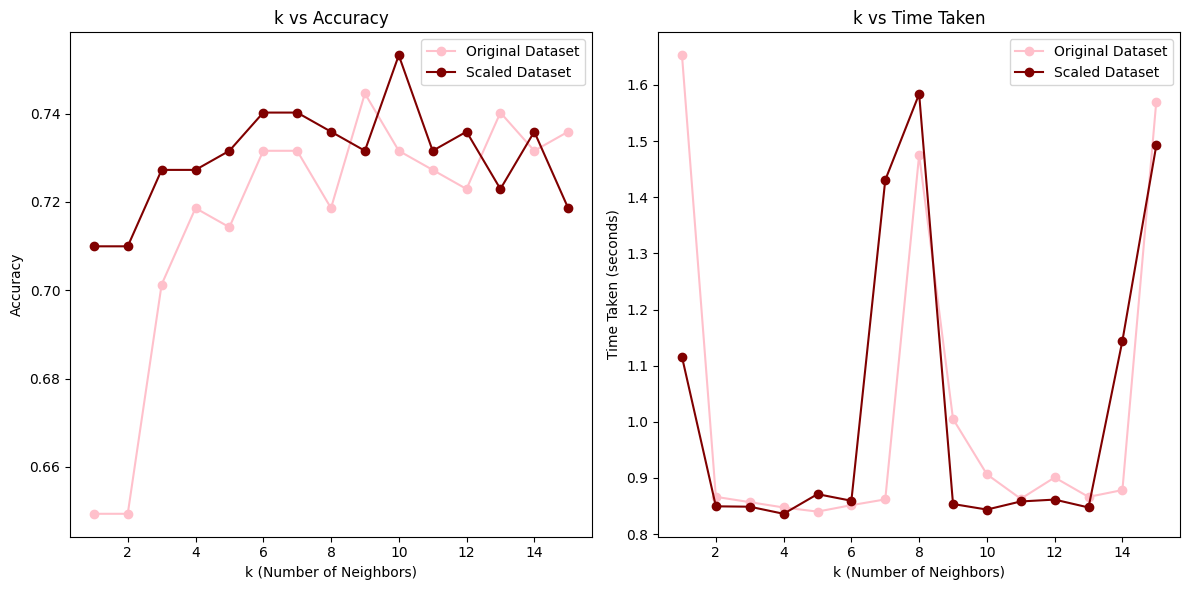

Optimal k based on accuracy (scaled dataset): 10
Optimal k based on time taken (scaled dataset): 4


In [ ]:
#Problem 3
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from collections import Counter

#euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#KNN Class
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train.values]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X_test):
        predictions = [self.predict_single(x) for x in X_test.values]
        return np.array(predictions)

#function to standardize (scale) the data
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

#varying k from 1 to 15 and measuring accuracy and time taken
k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    #KNN on original (unscaled) data
    knn_original = KNN(k=k)
    knn_original.fit(X_train, y_train)

    start_time = time.time()
    predictions_original = knn_original.predict(X_test)
    end_time = time.time()

    accuracy_original.append(np.mean(predictions_original == y_test))
    time_original.append(end_time - start_time)

    # KNN on scaled data
    knn_scaled = KNN(k=k)
    knn_scaled.fit(X_train_scaled, y_train)

    start_time = time.time()
    predictions_scaled = knn_scaled.predict(X_test_scaled)
    end_time = time.time()

    accuracy_scaled.append(np.mean(predictions_scaled == y_test))
    time_scaled.append(end_time - start_time)

#plot k vs Accuracy for original and scaled datasets
plt.figure(figsize=(12, 6))

#accuracy plot
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o', color='pink')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='o', color='#800000')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()

#time Taken plot
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', marker='o', color='pink')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='o', color='#800000')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()

plt.tight_layout()
plt.show()

#print the optimal k based on accuracy
optimal_k_accuracy = k_values[np.argmax(accuracy_scaled)]
print(f"Optimal k based on accuracy (scaled dataset): {optimal_k_accuracy}")

optimal_k_time = k_values[np.argmin(time_scaled)]
print(f"Optimal k based on time taken (scaled dataset): {optimal_k_time}")

The choice of
k
k affects both accuracy and computational cost in KNN. A small
k
k can lead to overfitting and lower accuracy, while a large
k
k might make the model too simplistic. As
k
k increases, the time to make predictions also increases. The optimal
k
k balances accuracy and computation time, with the scaled dataset often performing better in accuracy. Therefore, selecting the right
k
k is crucial for improving KNN's efficiency and performance.

#Problem 4
KNN can be slow and inefficient for large datasets and high-dimensional data. The algorithm becomes computationally expensive as the dataset size grows, and in high dimensions, distances between points become harder to distinguish, reducing performance.

To improve KNN efficiency, we can use:

Approximate Nearest Neighbors (ANN) for faster, approximate searches.

Dimensionality Reduction like PCA to reduce features.


Efficient data structures like KD-Trees or Ball Trees to speed up searches.


These techniques make KNN more scalable and faster for large datasets.